# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [1]:
import main
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


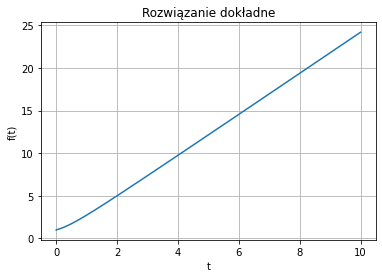

In [2]:
f = lambda t: t + np.sqrt(1 + 2 * t ** 2)
t = np.linspace(0, 10, 1000)
plt.plot(t, f(t))
plt.title("Rozwiązanie dokładne")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

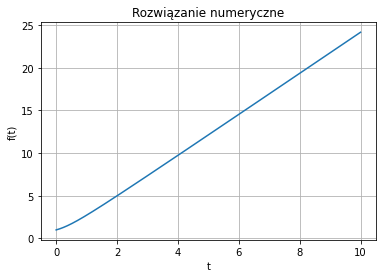

In [3]:
f = lambda t, x: (x + t) / (x - t)
t_span = np.linspace(0, 10, 1000)
y0 = np.array([1])
solution = main.solve_euler(f, t_span, y0)
plt.plot(t_span, solution)
plt.title("Rozwiązanie numeryczne")
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

Dokładność rozwiązania numerycznego zależy od ustawionego kroku. Dla małych wartości wykres jest bardzo kanciasty i niedokładny, natomiast dla dużych - niemal identyczny jak rozwiązanie dokładne.

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

In [4]:
def equations(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0] / ((x[0]**2 + x[1]**2)**(3/2))
    x4 = -x[1] / ((x[0]**2 + x[1]**2)**(3/2))
    
    return np.array([x1, x2, x3, x4])

t = np.linspace(0, 10, 100000)
solutions = main.solve_euler(equations, t, np.array([1, 0, 0, 1]).T)

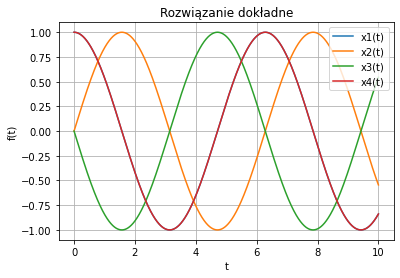

In [5]:
# Rozwiązanie dokładne
plt.plot(t, np.cos(t), t, np.sin(t), t, -np.sin(t), t, np.cos(t))
plt.title("Rozwiązanie dokładne")
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

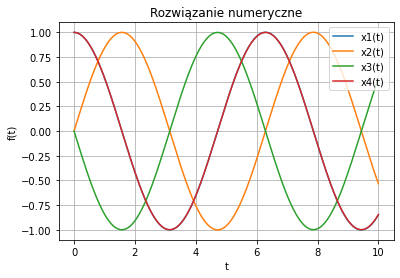

In [6]:
# Rozwiązanie numeryczne
plt.plot(t, solutions)
plt.title("Rozwiązanie numeryczne")
plt.legend(["x1(t)", "x2(t)", "x3(t)", "x4(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

Podobnie jak w zadaniu 1, dokładność rozwiązania numerycznego zależy od ustawionego kroku - w tym przypadku (krok 0.00001) rozwiązanie numeryczne jest bardzo dokładne.

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

In [7]:
def equations(t, x):
    A = np.array([[-667, 333], [666, -334]])
    return A @ x

t = np.linspace(0, 10, 10000)
solutions = main.solve_euler(equations, t, np.array([0, 3]).T)

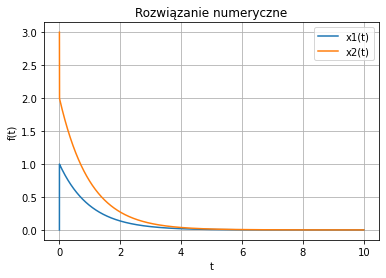

In [8]:
# Rozwiązanie numeryczne
plt.plot(t, solutions)
plt.title("Rozwiązanie numeryczne")
plt.legend(["x1(t)", "x2(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

Rozwiązaniem takiego układu równań jest równanie $x(t) = e^{\textbf{A}(t - t_0)}x_0$. Macierz tą obliczamy stosując dekompozycję Jordana.

***Zadanie 4.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

In [9]:
def arenstorf(t, x):
    mi = 0.012277471
    mi_prim = 1 - mi

    D1 = ((x[0] + mi)**2 + x[2]**2)**(3/2)
    D2 = ((x[0] - mi_prim)**2 + x[2]**2)**(3/2)
    
    x1 = x[1]
    x2 = x[0] + 2 * x[3] - mi_prim * (x[0] + mi) / D1 - mi * (x[0] - mi_prim) / D2
    x3 = x[3]
    x4 = x[2] - 2 * x[1] - mi_prim * x[2] / D1 -  mi * x[2] / D2
    
    return np.array([x1, x2, x3, x4])


T = 17.0652165601579625588917206249
solutions = main.solve_euler(arenstorf, np.linspace(0, T, 10000), np.array([0.994, 0, 0, -2.00158510637908252240537862224]).T)

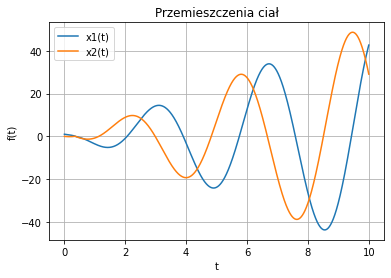

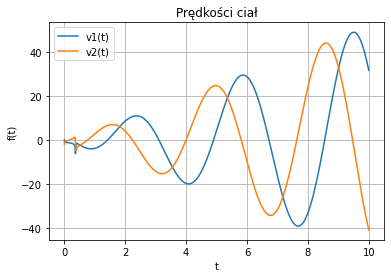

In [10]:
plt.plot(t, solutions[:, 0], t, solutions[:, 2])
plt.title("Przemieszczenia ciał")
plt.legend(["x1(t)", "x2(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

plt.plot(t, solutions[:, 1], t, solutions[:, 3])
plt.title("Prędkości ciał")
plt.legend(["v1(t)", "v2(t)"])
plt.ylabel("f(t)")
plt.xlabel("t")
plt.grid()
plt.show()

Wnioski:

Laboratorium pozwoliło na zaznajomienie się z numerycznymi metodami rozwiązywania równań różniczkowych zwyczajnych za pomocą metody Eulera. Metoda ta nie należy do najlepszych, ponieważ zwiększanie dokładności (kroku) znacząco zmniejsza efektywność - skrypt wykonuje się coraz dłużej. Metoda Eulera ma też inne ograniczenia. Można stosować tylko stały rozmiar kroku, więc nie ma możliwości oszacowania błędu podczas obliczeń.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
